## User Manual (very simple)





https://medium.com/@houfuchen0702/how-i-tracked-my-spending-by-openai-api-with-diy-flexibility-457da688b264



### Step 1. Download your spending as a csv, from the online banking website


### Step 2. Drag the CSV file into here, like this


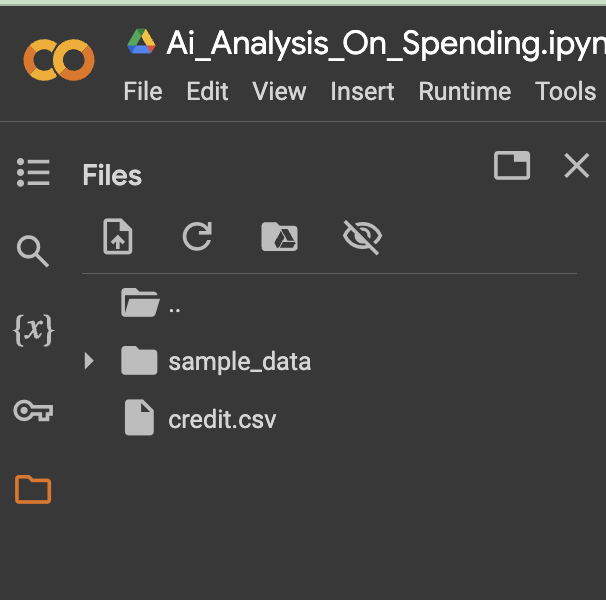


### Step 3. Almost there, you just need to change  

*   file_path
*   openai.api_key



### Step 4. ... and RUN!!!!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
import openai

Monthly Spending Summary by Category:
        Category     Out
0     Food/Drink  369.43
1          Other  209.86
2       Shopping  122.17
3  Subscriptions   71.72
4           Uber  126.90


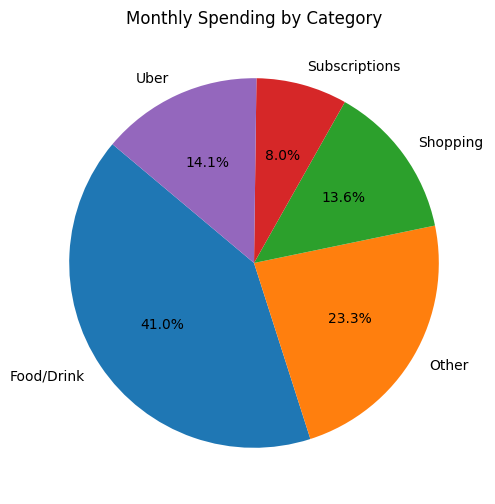


Transactions in 'Food/Drink' Category:
         Date                Description    Out
3  2024-10-19             THE SWEET SPOT  11.19
9  2024-10-18  SQ *PAULS COFFEE LTD. 196  13.58
10 2024-10-18   SQ *THE HEART BREAK CHEF  22.40
11 2024-10-17   ROBARTS STARBUCKS - UOFT  10.40
13 2024-10-17               QIN'S GARDEN  57.76
16 2024-10-16             YUE LAI BUFFET  14.90
17 2024-10-16   18 FEET ESPRESSO BAR AND   6.01
18 2024-10-16         THE WAY OF NOODLES  16.33
19 2024-10-15             SANSOTEI RAMEN  48.49
25 2024-10-14     BINGZ CRISPY BURGER EA   8.30
27 2024-10-11             YUE LAI BUFFET  19.53
28 2024-10-10          TIM HORTONS #2224  14.44
29 2024-10-09          TIM HORTONS #3065   3.87
33 2024-10-09          TIM HORTONS #1634   5.63
34 2024-10-08           LOBLAW MLG #1007  13.83
35 2024-10-08         THE WAY OF NOODLES  18.19
37 2024-10-07        HOT HOT RICE NOODLE  13.91
38 2024-10-06    MIKAKU UDON BAR CARLTON  70.67

Transactions in 'Other' Category:
         Date

In [ ]:
openai.api_key = "<enter your api key here>"


# Step 1: Load the CSV
def load_data(file_path):
    df = pd.read_csv(file_path, names=["Date", "Description", "Out", "In", "Current_Owning"])
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Out'] = pd.to_numeric(df['Out'], errors='coerce').fillna(0)
    return df[['Date', 'Description', 'Out']]


# Step 2: Categorize using ChatGPT
MyCategories = ['Food/Drink', 'Shopping', 'Uber', 'Subscriptions', 'Other'] # feel free to DIY into different categories!!
def categorize_with_chatgpt(description):
    try:
        response = openai.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a helpful assistant for categorizing bank transactions."},
                {"role": "user", "content": f"Please categorize this transaction description: '{description}'. Please keep it simple, and mainly categorize it into '{MyCategories}'. Just say the specific word, do not say anything else"}
            ]
        )
        #print(response)
        category = response.choices[0].message.content.strip()
        return category
    except Exception as e:
        print(f"Error: {e}")
        return "Other"

def categorize_transactions(df):
    # Apply categorization with ChatGPT to each description
    df['Category'] = df['Description'].apply(categorize_with_chatgpt)
    return df

# Step 3: Monthly analysis
def monthly_analysis(df):
    monthly_summary = df.groupby('Category')['Out'].sum().reset_index()
    return monthly_summary

# Step 4: Plot the spending distribution
def plot_spending_distribution(summary_df):
    plt.figure(figsize=(8, 6))
    plt.pie(summary_df['Out'], labels=summary_df['Category'], autopct='%1.1f%%', startangle=140)
    plt.title('Monthly Spending by Category')
    plt.show()

def display_transactions_by_category(df):
    grouped = df.groupby('Category')
    for category, transactions in grouped:
        print(f"\nTransactions in '{category}' Category:")
        print(transactions[['Date', 'Description', 'Out']])


# Step 5: Run the program
def main(file_path):
    df = load_data(file_path)
    df = categorize_transactions(df)
    summary_df = monthly_analysis(df)

    print("Monthly Spending Summary by Category:")
    print(summary_df)

    plot_spending_distribution(summary_df)

    # Display 'Other' transactions for more insight
    display_transactions_by_category(df)


# Specify the path to your CSV file
file_path = "<enter your file path here>"  # Replace with your actual file path
main(file_path)
